In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
headers= pd.read_csv("C:/Users/ridav/OneDrive/Documents/Headers.2025-03-18.na-us_R (2).csv")


In [8]:
print("=== BASIC DATASET OVERVIEW ===")
print(f"Dataset shape: {headers.shape}")
print("\nColumn types:")
print(headers.dtypes)
print("\nMissing values:")
print(headers.isnull().sum())

=== BASIC DATASET OVERVIEW ===
Dataset shape: (43546, 17)

Column types:
Marketplace                         object
Invoice Date                        object
Payment Due Date                    object
Invoice Status                      object
Actual Paid Amount                 float64
Paid Amount Currency                object
Payee                               object
Invoice Creation Date               object
Randomized Invoice                  object
Invoice Amount                     float64
Invoice Currency                    object
Any Deductions                        bool
Quantity Variance Amount           float64
Price Variance Amount              float64
Quick Pay Discount Amount          float64
Randomized Latest Child Invoice     object
Randomized PO                       object
dtype: object

Missing values:
Marketplace                            0
Invoice Date                           0
Payment Due Date                       0
Invoice Status                         0
A

In [9]:
duplicates = headers.duplicated().sum()
print(f"Complete duplicate rows: {duplicates}")

Complete duplicate rows: 0


In [16]:
# Convert date columns
headers['Payment Due Date'] = pd.to_datetime(headers['Payment Due Date'])
headers['Invoice Date'] = pd.to_datetime(headers['Invoice Date'])
headers['Invoice Creation Date'] = pd.to_datetime(headers['Invoice Creation Date'])

In [17]:
headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43546 entries, 0 to 43545
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Marketplace                      43546 non-null  object        
 1   Invoice Date                     16054 non-null  datetime64[ns]
 2   Payment Due Date                 43546 non-null  datetime64[ns]
 3   Invoice Status                   43546 non-null  object        
 4   Actual Paid Amount               43546 non-null  float64       
 5   Paid Amount Currency             43546 non-null  object        
 6   Payee                            43546 non-null  object        
 7   Invoice Creation Date            15725 non-null  datetime64[ns]
 8   Randomized Invoice               43546 non-null  object        
 9   Invoice Amount                   43546 non-null  float64       
 10  Invoice Currency                 43546 non-null  object   

In [18]:
# Check for missing dates
missing_dates = headers['Payment Due Date'].isnull().sum()
print(f"Missing Payment Due Dates: {missing_dates}")

Missing Payment Due Dates: 0


In [ ]:
# Calculate total shortage amount
# Shortage = Difference between Invoice Amount and Actual Paid Amount + Adjustments
headers['Total Shortage'] = (headers['Invoice Amount'] - headers['Actual Paid Amount'] + 
                       headers['Quantity Variance Amount'] + 
                       headers['Price Variance Amount'] + 
                       headers['Quick Pay Discount Amount'])
headers.head(3)


,Marketplace,Invoice Date,Payment Due Date,Invoice Status,Actual Paid Amount,Paid Amount Currency,Payee,Invoice Creation Date,Randomized Invoice,Invoice Amount,Invoice Currency,Any Deductions,Quantity Variance Amount,Price Variance Amount,Quick Pay Discount Amount,Randomized Latest Child Invoice,Randomized PO,Total Shortage
0,US,2021-08-07,2023-08-14,PAID,105.60,USD,GHIJK,2021-08-07,YYRFF3339197,105.60,USD,False,0.0,0.0,2.11,NaN,2G613DYP,2.11
1,US,2021-08-07,2023-08-14,PAID,18365.12,USD,ABCDE,2021-08-07,NQWXT9084454,18365.12,USD,False,0.0,0.0,367.56,NQWXT9084454SCR,937VLC8C,367.56
2,US,2021-08-07,2023-08-14,PAID,124.50,USD,ABCDE,2021-08-07,RVHXE4032614,124.50,USD,True,24.9,0.0,2.49,NaN,1ILHYU5O,27.39


In [22]:

# Extract year from Payment Due Date for annual analysis
headers['Payment Year'] = headers['Payment Due Date'].dt.year

# Filter only records with shortages (positive values)
shortage = headers[headers['Total Shortage'] > 0].copy()
print(f"Total records with shortages: {len(shortage)}")

Total records with shortages: 38746


In [26]:
print(f"💰 Total Shortage Amount: ${total_shortage:,.2f}")

💰 Total Shortage Amount: $12,300,606.89


In [ ]:
#  EXTRACT THE YEAR FROM THE PAYMENT DUE DATE
headers['Payment_Year'] = headers['Payment Due Date'].dt.year

# Verify that the column was created
print("="*50)
print("“COLUMNS AFTER REMOVING THE YEAR”")
print("="*50)
print(headers[['Payment Due Date', 'Payment_Year', 'Total Shortage']].head())




“COLUMNS AFTER REMOVING THE YEAR”
  Payment Due Date  Payment_Year  Total Shortage
0       2023-08-14          2023            2.11
1       2023-08-14          2023          367.56
2       2023-08-14          2023           27.39
3       2023-08-14          2023          112.58
4       2023-08-14          2023         1550.07



TOTAL SHORTAGE PER YEAR
              Total_Shortage_Amount  Total_Records
Payment_Year                                      
2021                     1260421.01           2441
2022                     1372724.86           6941
2023                      977379.89          13797
2024                     2239489.94          17389
2025                     6417319.46           2978


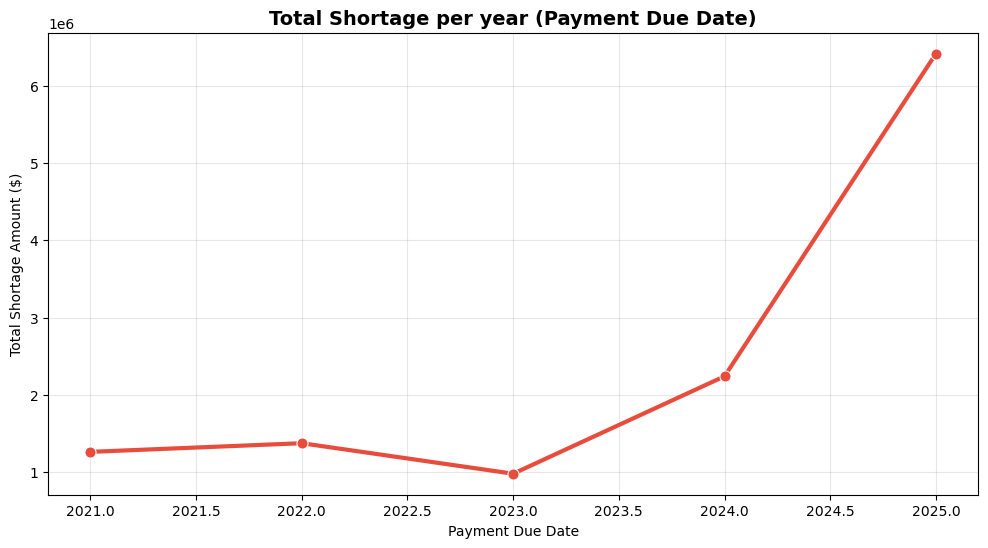

In [67]:
#  GROUP BY YEAR AND CALCULATE TOTAL SHORTAGE
yearly_shortages = headers.groupby('Payment_Year').agg({
    'Total Shortage': 'sum',
    'Randomized Invoice': 'count'  # To view the number of records per year
}).round(2)

yearly_shortages.columns = ['Total_Shortage_Amount', 'Total_Records']
print("\n" + "="*50)
print("TOTAL SHORTAGE PER YEAR")
print("="*50)
print(yearly_shortages)

#  LINE GRAPH- TOTAL SHORTAGE PER AÑO
plt.figure(figsize=(12, 6))

# Lineplot
sns.lineplot(
    data=yearly_shortages,
    x=yearly_shortages.index,
    y='Total_Shortage_Amount',
    marker='o',
    linewidth=3,
    markersize=8,
    color='#E74C3C'
)

plt.title('Total Shortage per year (Payment Due Date)', fontsize=14, fontweight='bold')
plt.xlabel('Payment Due Date')
plt.ylabel('Total Shortage Amount ($)')
plt.grid(True, alpha=0.3)

In [ ]:

#  Final Summary
print("\n" + "="*50)
print("Executive summary")
print("="*50)
print(f"• period under review: {yearly_shortages.index.min()} - {yearly_shortages.index.max()}")
print(f"• Total shortage: ${yearly_shortages['Total_Shortage_Amount'].sum():,.2f}")
print(f"• Annual average shortage: ${yearly_shortages['Total_Shortage_Amount'].mean():,.2f}")
print(f"• Years with data: {len(yearly_shortages)}")



Executive summary
• period under review: 2021 - 2025
• Total shortage: $12,267,335.16
• Annual average shortage: $2,453,467.03
• Years with data: 5


In [ ]:
#  CALCULATE THE AGING OF SHORTAGES
current_date = pd.Timestamp.now()
headers['Aging_Days'] = (current_date - headers['Payment Due Date']).dt.days

#  Categorize into Aging Groups
def categorize_aging(days):
    if days <= 30:
        return '0-30 days'
    elif days <= 90:
        return '31-90 days'
    elif days <= 180:
        return '91-180 days'
    elif days <= 365:
        return '181-365 days'
    else:
        return 'Over 365 days'

headers['Aging_Bucket'] = headers['Aging_Days'].apply(categorize_aging)

#  FILTER ONLY RECORDS WITH SHORTAGE
shortage_df = headers[headers['Total Shortage'] > 0].copy()

print("AGED SHORTAGES ANALYSIS")
print(f"Total records with shortages: {len(shortage_df)}")
print(f"Date of analysis: {current_date.strftime('%Y-%m-%d')}")



AGED SHORTAGES ANALYSIS
Total records with shortages: 38746
Date of analysis: 2025-10-05


In [ ]:
#  ANALYSIS OF AGED SHORTAGES PER YEAR
aged_analysis = shortage_df.groupby(['Payment_Year', 'Aging_Bucket']).agg({
    'Total Shortage': ['sum', 'count'],
    'Randomized Invoice': 'nunique'
}).round(2)

aged_analysis.columns = ['Aged_Shortage_Amount', 'Aged_Record_Count', 'Unique_Invoices']
print("\nAged Shortages by Year and Bucket:")
print(aged_analysis)



Aged Shortages by Year and Bucket:
                            Aged_Shortage_Amount  Aged_Record_Count  \
Payment_Year Aging_Bucket                                             
2021         Over 365 days            1260878.24               2404   
2022         Over 365 days            1381639.56               6736   
2023         Over 365 days             981180.86              12376   
2024         181-365 days             1073537.52               4058   
             Over 365 days            1182301.81              10697   
2025         181-365 days             1688252.44               1950   
             91-180 days              4732816.46                525   

                            Unique_Invoices  
Payment_Year Aging_Bucket                    
2021         Over 365 days             2404  
2022         Over 365 days             6736  
2023         Over 365 days            12376  
2024         181-365 days              4058  
             Over 365 days            10697  
20

In [59]:
aged_pivot = shortage_df.pivot_table(
    values='Total Shortage',
    index='Payment_Year',
    columns='Aging_Bucket',
    aggfunc='sum',
    fill_value=0
)


print("AGED SHORTAGES PIVOT TABLE")
print(aged_pivot)

AGED SHORTAGES PIVOT TABLE
Aging_Bucket  181-365 days  91-180 days  Over 365 days
Payment_Year                                          
2021                  0.00         0.00     1260878.24
2022                  0.00         0.00     1381639.56
2023                  0.00         0.00      981180.86
2024            1071574.66         0.00     1184264.67
2025            1688252.44   4732816.46           0.00


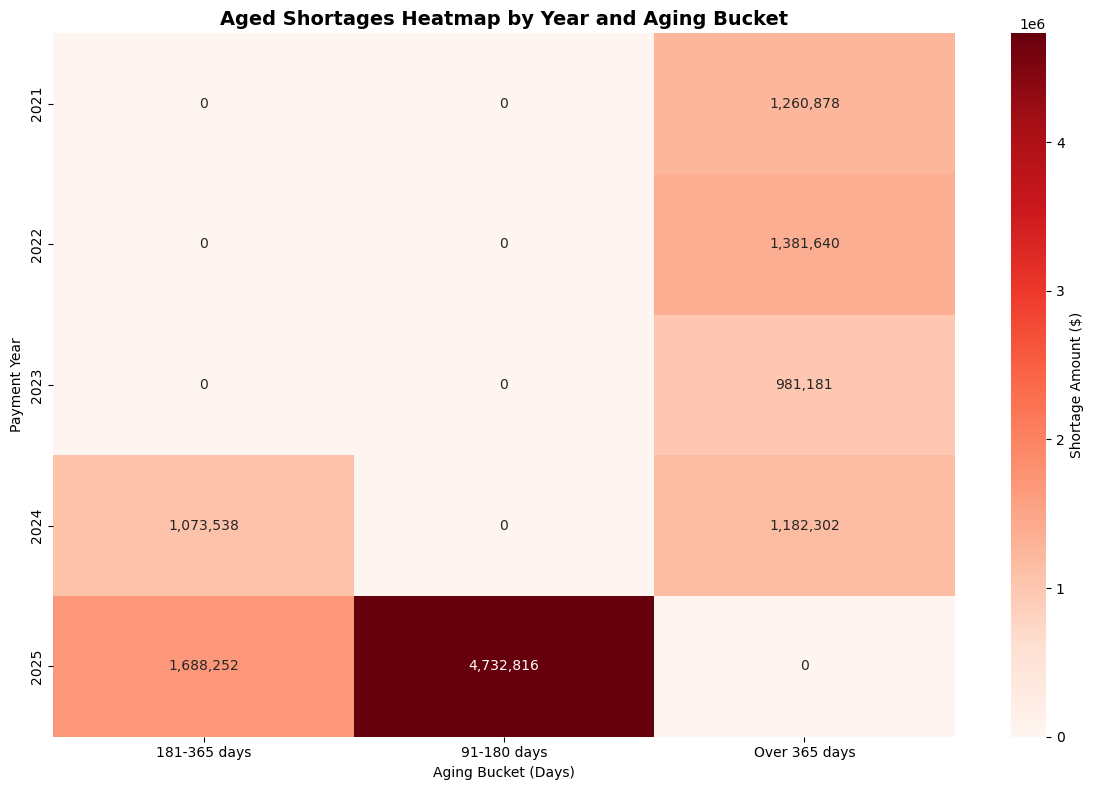

In [ ]:
# GRAPH 1: HEATMAP OF AGED SHORTAGES
plt.figure(figsize=(12, 8))
sns.heatmap(aged_pivot, 
            annot=True, 
            fmt=',.0f', 
            cmap='Reds', 
            cbar_kws={'label': 'Shortage Amount ($)'})
plt.title('Aged Shortages Heatmap by Year and Aging Bucket', fontsize=14, fontweight='bold')
plt.xlabel('Aging Bucket (Days)')
plt.ylabel('Payment Year')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

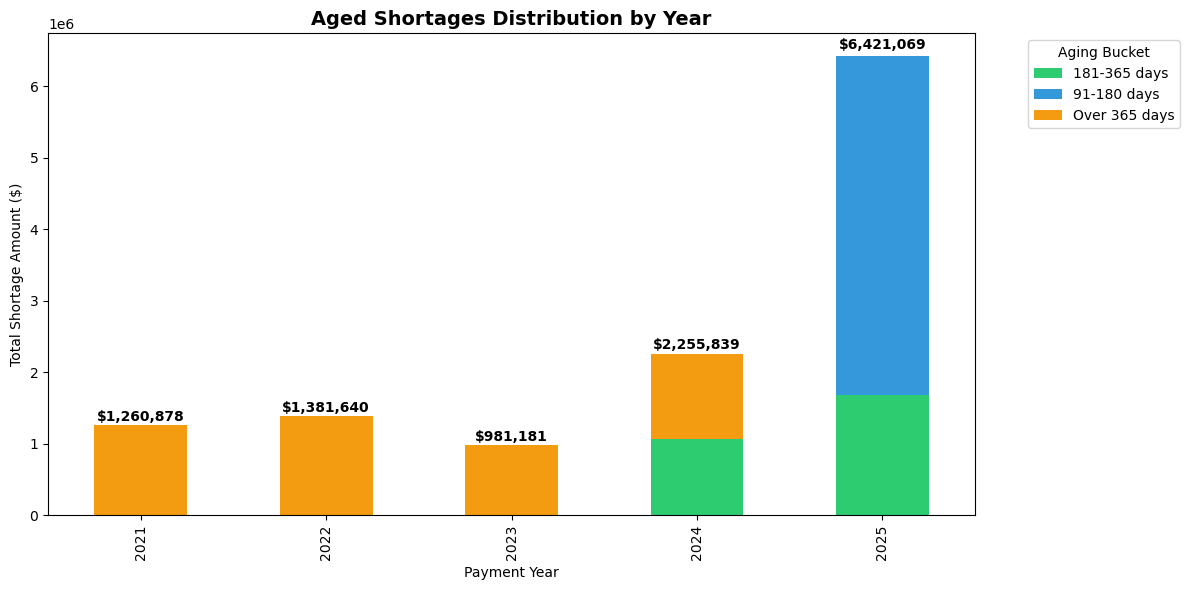

In [66]:
# GRAPH 2: STACKED BAR CHART PER YEAR
plt.figure(figsize=(12, 6))

# Data for stacked bars
aged_pivot_percentage = aged_pivot.div(aged_pivot.sum(axis=1), axis=0) * 100

ax = aged_pivot.plot(kind='bar', 
                     stacked=True, 
                     figsize=(12, 6),
                     color=['#2ECC71', '#3498DB', '#F39C12', '#E74C3C', '#9B59B6'])

plt.title('Aged Shortages Distribution by Year', fontsize=14, fontweight='bold')
plt.xlabel('Payment Year')
plt.ylabel('Total Shortage Amount ($)')
plt.legend(title='Aging Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add total values to the bars
for i, total in enumerate(aged_pivot.sum(axis=1)):
    ax.text(i, total + (total * 0.01), f'${total:,.0f}', 
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()
